#### Aim --> To predict how much impurity (% of silica) is in the ore concentrate
#### Need --> The engineering measurements takes more time to calculate the % of silica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# Load and process the data

In [2]:
df = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv')

In [3]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [4]:
df.shape # rows -> 737453 , columns -> 24

(737453, 24)

In [5]:
df.info() # all values present in object dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

In [6]:
df.duplicated().sum() #duplicate values --> 1171

1171

In [7]:
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

In [8]:
df.shape # removing duplicates then presented recodes --> 736282

(736282, 24)

In [9]:
df = df.drop('date', axis = 1) #drop the date column

In [10]:
df.isnull().sum()[df.isnull().sum()>0] #no null values

Series([], dtype: int64)

In [11]:
# transform to . and object type from str to float

for data in df.columns:
    df[data]= df[data].str.replace(',','.').astype(float)

In [12]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,...,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,...,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,...,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,...,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,...,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,...,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


# Data visualization

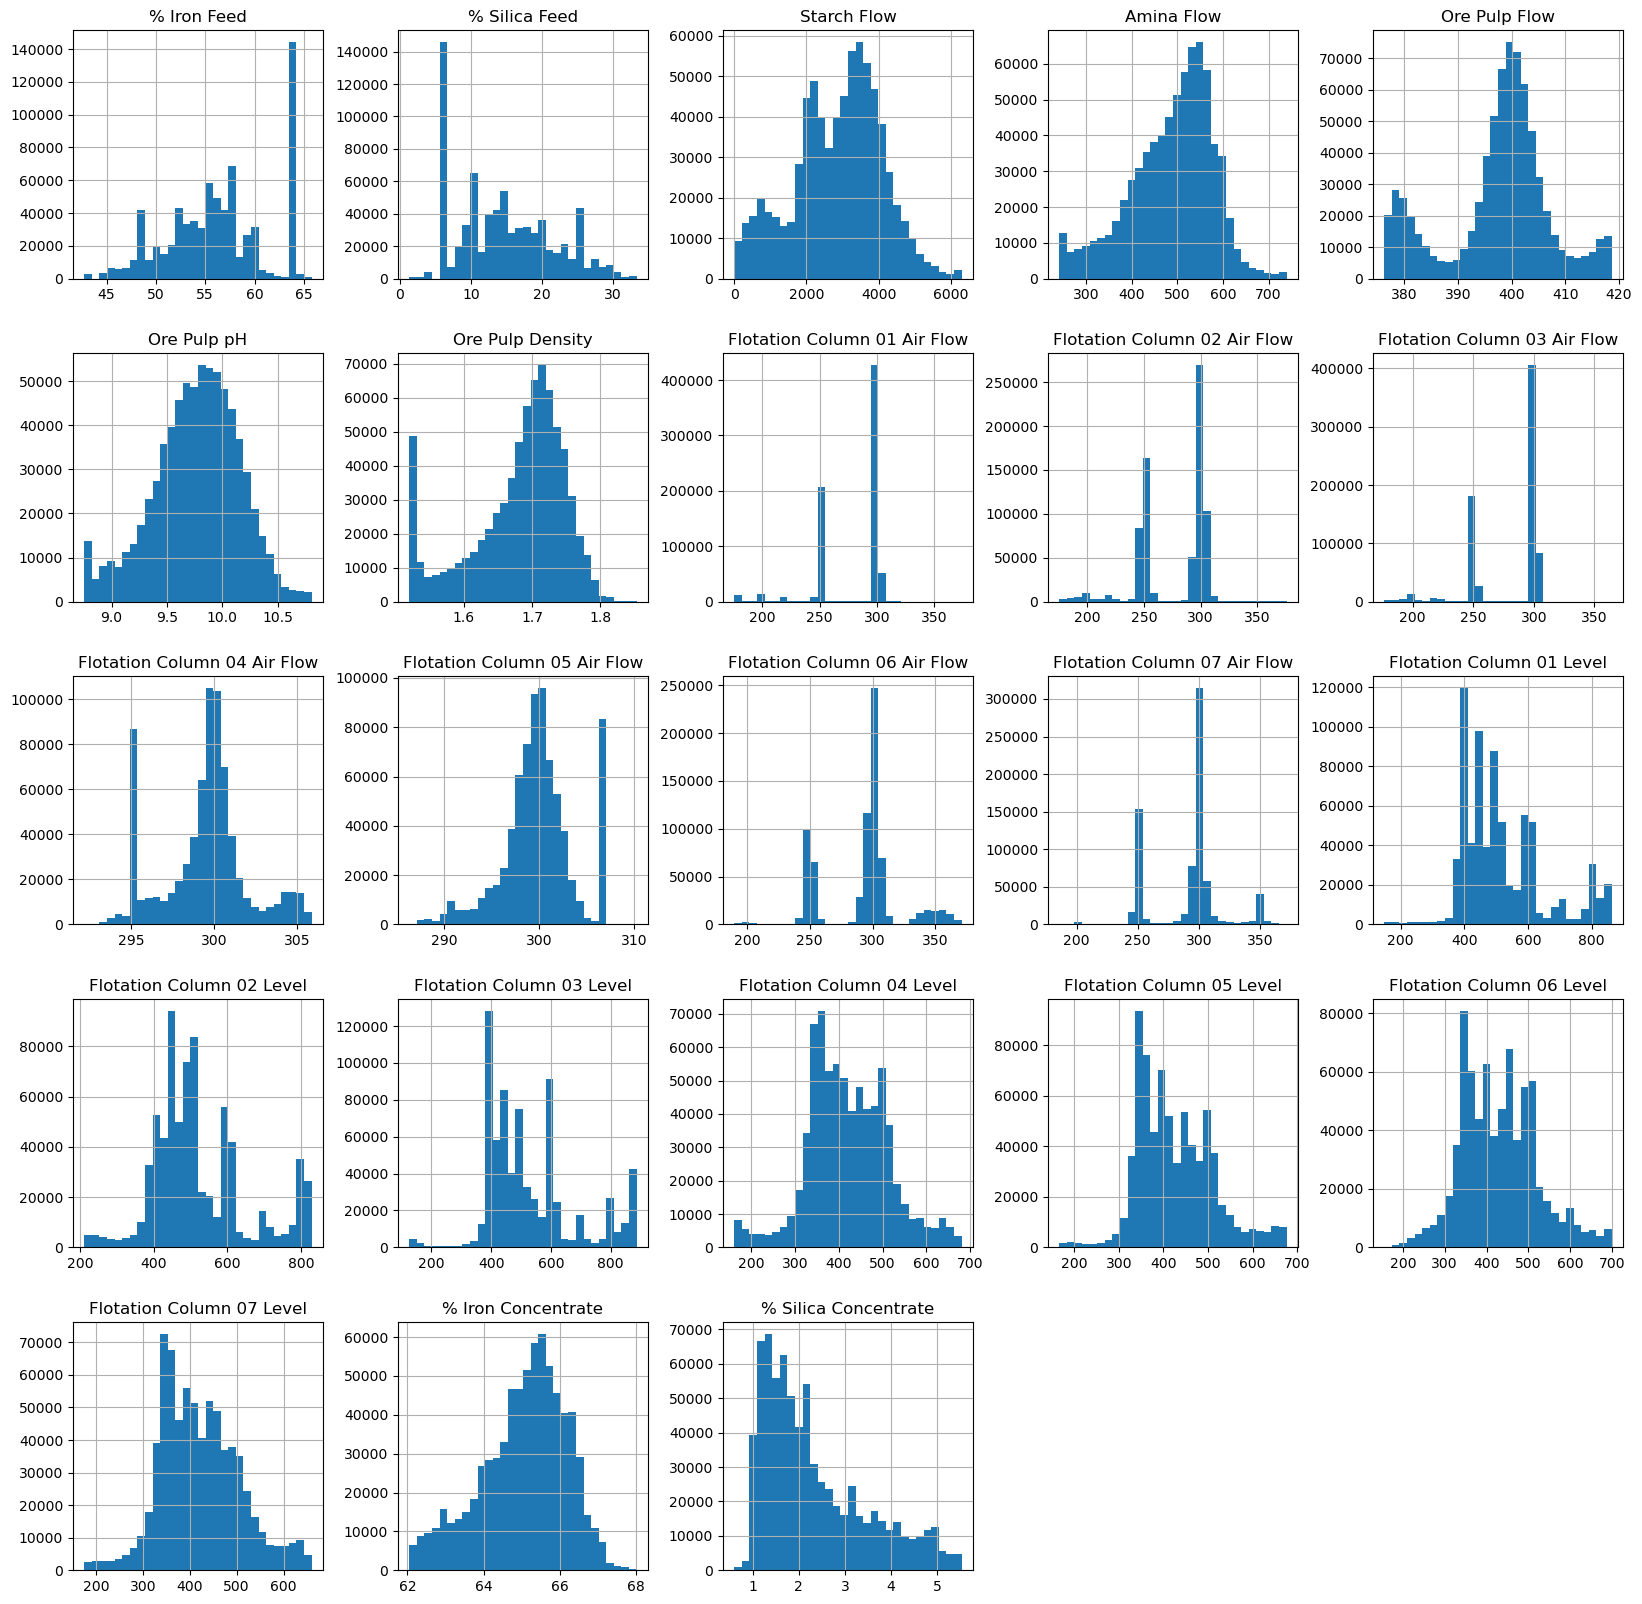

In [13]:
# checking distribution within variables 

df.hist(bins=30, figsize= (20, 20))
plt.title('Histogram plot of all features')
plt.show()

#### --> Several variables are more or less Normal Distributed
#### --> Exception of 7 airflow columns which quite ugly distribution
#### --> % iron feed and % silica feed shows almost inverse mirror behavior
#### --> Inverse behavior shows presence more of iron in feed has low presence of silica and viceversa

In [14]:
# checking outliars in varibles 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_1 = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_1 = df_1.melt()

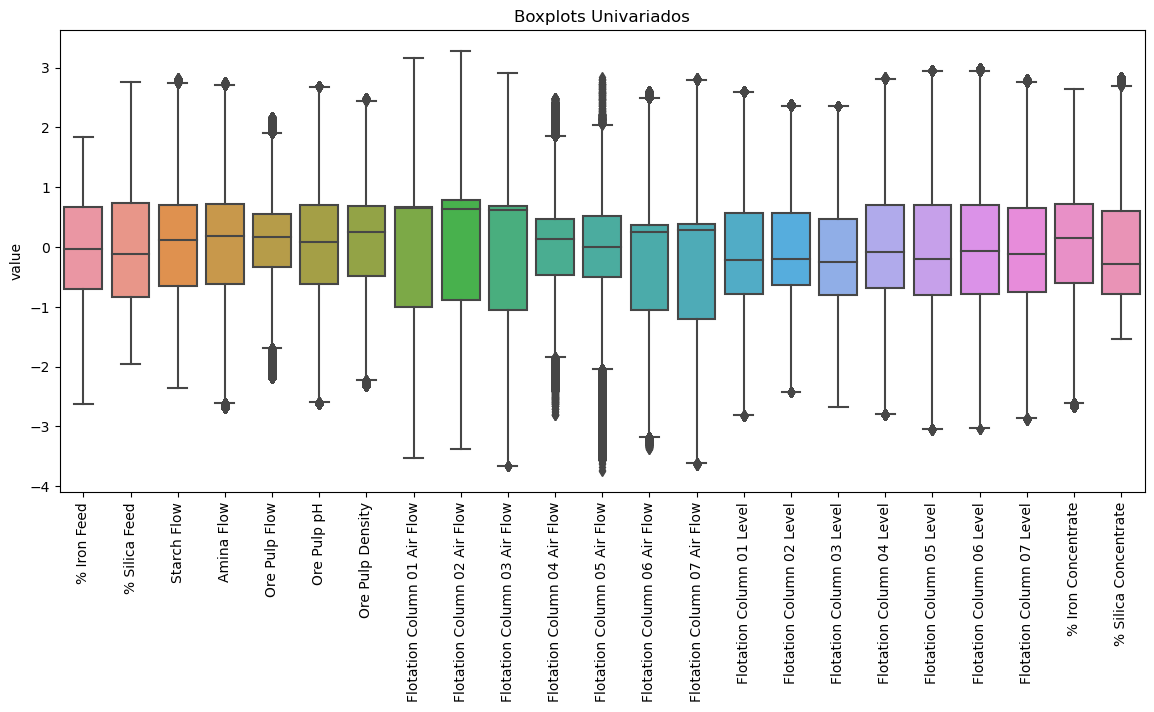

In [15]:
plt.figure(figsize=(14,6),dpi=100)
sns.boxplot(x=df_1["variable"], y=df_1["value"]);
plt.xticks(rotation=90);
plt.xlabel("");
plt.title("Boxplots Univariados");

#### --> Most of my variables do not have outliers or have very few
#### --> Exception of some columns of Flotation Columns Air Flow 

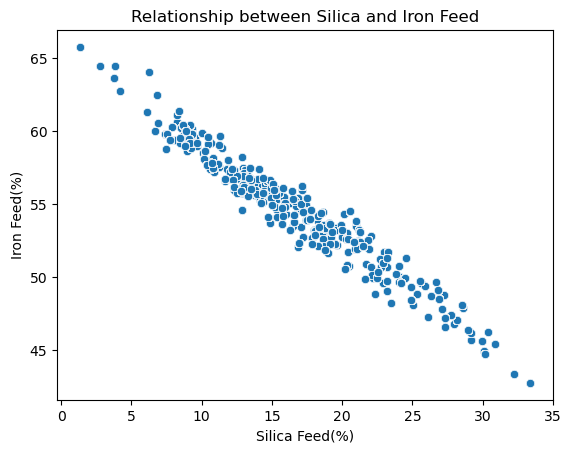

In [16]:
sns.scatterplot(x='% Silica Feed', y='% Iron Feed', data=df)
plt.xlabel('Silica Feed(%)')
plt.ylabel('Iron Feed(%)')
plt.title('Relationship between Silica and Iron Feed')
plt.show()

#### --> Plot shows downward trend between Iron feed and Silica feed

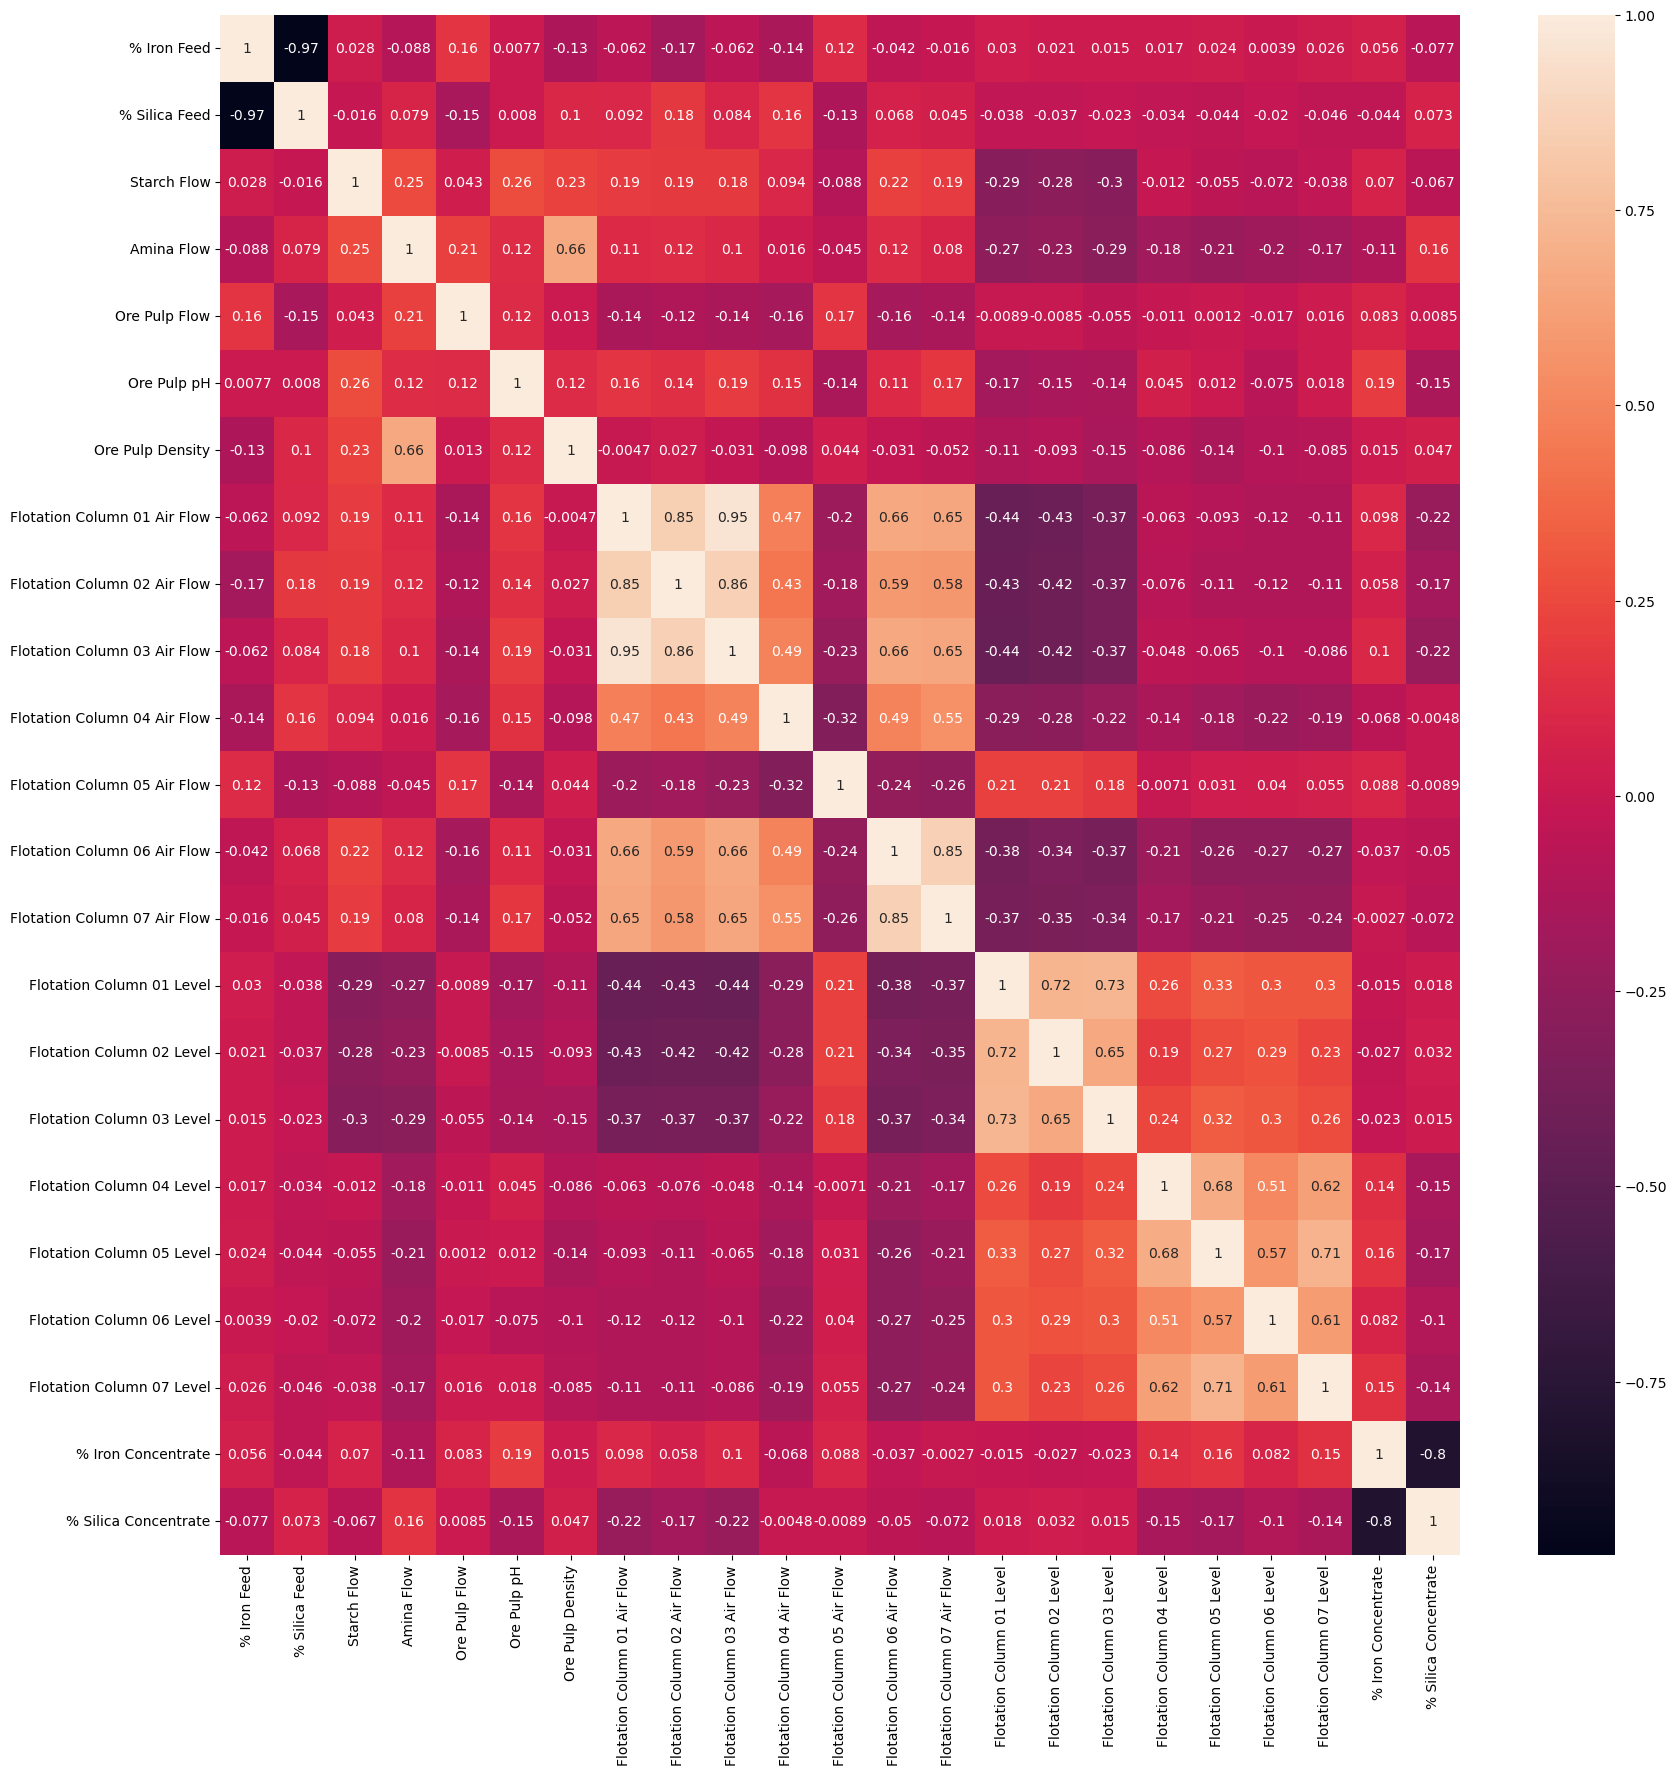

In [17]:
# Checking the corelation of all the inputs
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),annot=True)
plt.show()

## From Correlation Matrix, possible features relating with label are as follows:¶
#### -->iron concentrate
#### -->amina flow
#### -->ore pulp flow
#### -->ore pulp density
#### -->flotation air flow (01|02|03)
#### -->flotation column level (04|05|06|07)
#### -->% silica feed 

# Feature Selection

In [18]:
df_x = df.iloc[:, 0:21]
df_y = df.iloc[:, 22]
l1 =list(df_x.columns)
l2= list(pd.Series(list(map(lambda x: df_y.corr(df_x[x]), df_x.columns))).abs())
sign = pd.DataFrame()
sign['col'] = l1
sign['corr'] = l2
sign

,col,corr
0,% Iron Feed,0.077179
1,% Silica Feed,0.072676
2,Starch Flow,0.066813
3,Amina Flow,0.156981
4,Ore Pulp Flow,0.008497
5,Ore Pulp pH,0.147211
6,Ore Pulp Density,0.047002
7,Flotation Column 01 Air Flow,0.219076
8,Flotation Column 02 Air Flow,0.167259
9,Flotation Column 03 Air Flow,0.218834


#### Selecting only important parameters for model building that reduce the performace
#### So, taking all parameters for model building 

# Data Sampling

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_df, test_df = train_test_split(df, test_size=.2)

In [21]:
train_df_x = train_df.drop('% Silica Concentrate', axis=1)
train_df_y = train_df['% Silica Concentrate']

In [22]:
test_df_x = test_df.drop('% Silica Concentrate', axis=1)
test_df_y = test_df['% Silica Concentrate']

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [24]:
linreg.fit(train_df_x,train_df_y)

LinearRegression()

In [25]:
pred = linreg.predict(test_df_x)

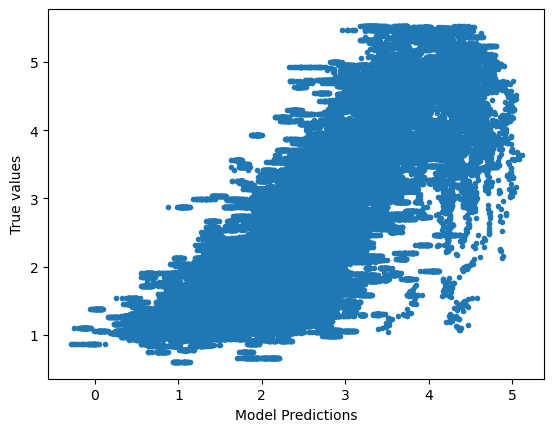

In [26]:
plt.plot(pred, test_df_y, '.')
plt.xlabel('Model Predictions')
plt.ylabel('True values')
plt.show()

<Axes: xlabel='% Silica Concentrate'>

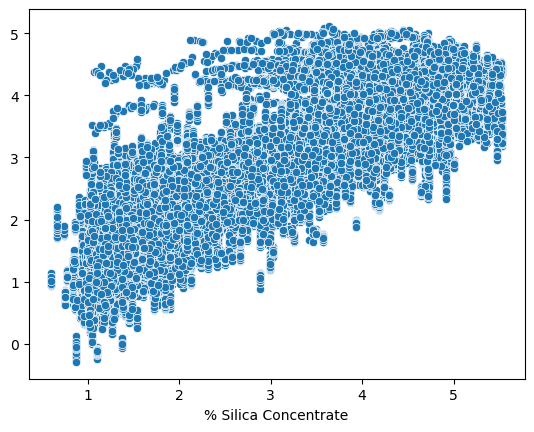

In [27]:
sns.scatterplot(x=test_df_y,y=pred)

In [28]:
k =test_df_x.shape[1]
n = len(test_df_x)
err = test_df_y - pred
mape = np.mean(np.abs(err*100 / test_df_y))
acc = 100 - mape
rmse = float(format(np.sqrt(mean_squared_error(test_df_y, pred)),'.3f'))
mse = mean_squared_error(test_df_y, pred)
mae = mean_absolute_error(test_df_y, pred)
r2 = r2_score(test_df_y, pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',rmse, '\nMSE =',mse, '\nMAE =',mae, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =',mape,'\nAccuracy =' ,acc) 

RMSE = 0.636 
MSE = 0.40442717972292425 
MAE = 0.49185562349230594 
R2 = 0.6806922974840317 
Adjusted R2 = 0.6806445858857911 
MAPE = 24.12249914092857 
Accuracy = 75.87750085907143


# Ridge regression

In [29]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [30]:
ridge.fit(train_df_x, train_df_y)

Ridge()

In [31]:
pred_rid=ridge.predict(test_df_x)

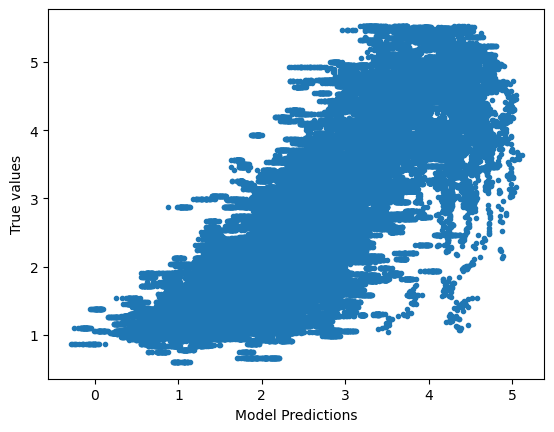

In [32]:
plt.plot(pred_rid, test_df_y, '.')
plt.xlabel('Model Predictions')
plt.ylabel('True values')
plt.show()

<Axes: xlabel='% Silica Concentrate'>

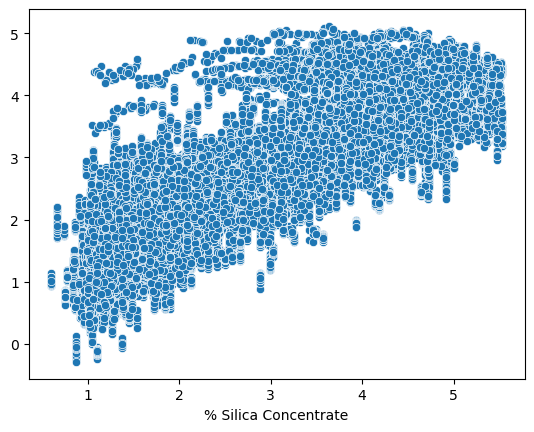

In [33]:
sns.scatterplot(x=test_df_y,y=pred_rid)

In [34]:
k =test_df_x.shape[1]
n = len(test_df_x)
err_rid = test_df_y - pred_rid
mape_rid = np.mean(np.abs(err_rid*100 / test_df_y))
acc_rid = 100 - mape_rid
rmse_rid = float(format(np.sqrt(mean_squared_error(test_df_y, pred_rid)),'.3f'))
mse_rid = mean_squared_error(test_df_y, pred_rid)
mae_rid = mean_absolute_error(test_df_y, pred_rid)
r2_rid = r2_score(test_df_y, pred_rid)
adj_r2_rid = 1-(1-r2_rid)*(n-1)/(n-k-1)

print('RMSE =',rmse_rid, '\nMSE =',mse_rid, '\nMAE =',mae_rid, '\nR2 =', r2_rid, '\nAdjusted R2 =', adj_r2_rid,'\nMAPE =',mape_rid,'\nAccuracy =' ,acc_rid) 

RMSE = 0.636 
MSE = 0.4044271908261041 
MAE = 0.4918557508451612 
R2 = 0.6806922887177295 
Adjusted R2 = 0.680644577118179 
MAPE = 24.122501192770784 
Accuracy = 75.87749880722922


# Lasso regression

In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [36]:
lasso.fit(train_df_x, train_df_y)

Lasso()

In [37]:
pred_las=lasso.predict(test_df_x)

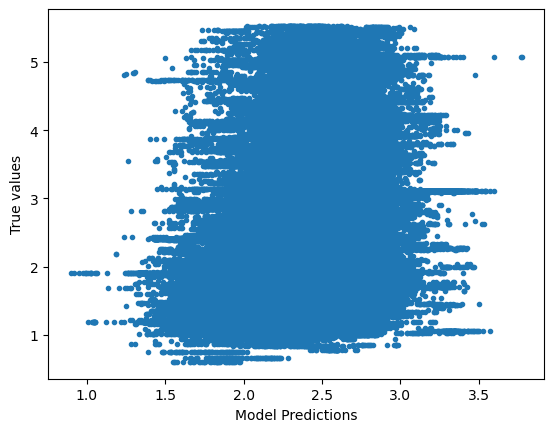

In [38]:
plt.plot(pred_las, test_df_y, '.')
plt.xlabel('Model Predictions')
plt.ylabel('True values')
plt.show()

<Axes: xlabel='% Silica Concentrate'>

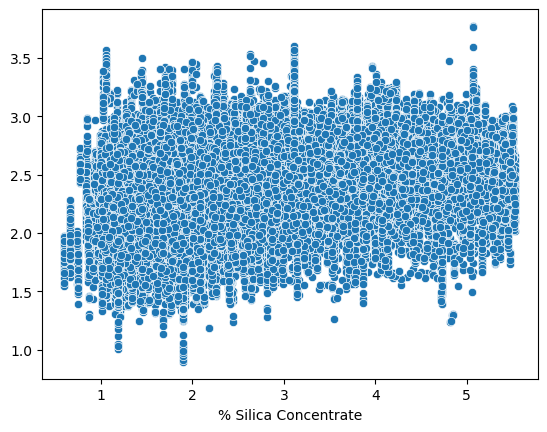

In [39]:
sns.scatterplot(x=test_df_y,y=pred_las)

In [40]:
k =test_df_x.shape[1]
n = len(test_df_x)
err_las = test_df_y - pred_las
mape_las = np.mean(np.abs(err_las*100 / test_df_y))
acc_las = 100 - mape_las
rmse_las = float(format(np.sqrt(mean_squared_error(test_df_y, pred_las)),'.3f'))
mse_las = mean_squared_error(test_df_y, pred_las)
mae_las = mean_absolute_error(test_df_y, pred_las)
r2_las = r2_score(test_df_y, pred_las)
adj_r2_las = 1-(1-r2_las)*(n-1)/(n-k-1)

print('RMSE =',rmse_las, '\nMSE =',mse_las, '\nMAE =',mae_las, '\nR2 =', r2_las, '\nAdjusted R2 =', adj_r2_las, '\nMAPE =',mape_las,'\nAccuracy =' ,acc_las) 

RMSE = 1.058 
MSE = 1.1199564158747675 
MAE = 0.8429497960439936 
R2 = 0.11575994888377217 
Adjusted R2 = 0.11562782395933513 
MAPE = 41.59172883407075 
Accuracy = 58.40827116592925


# Decision Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [42]:
dt.fit(train_df_x, train_df_y)

DecisionTreeRegressor()

In [43]:
pred_dt =dt.predict(test_df_x)

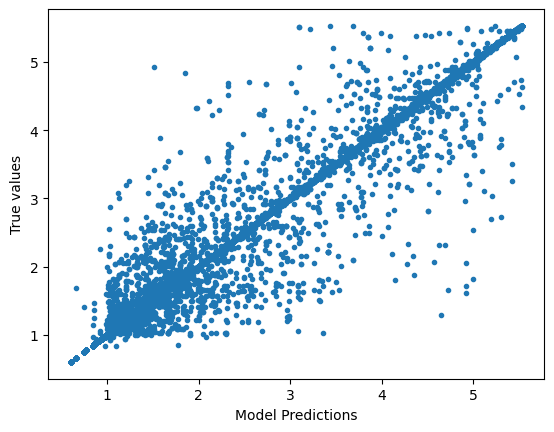

In [44]:
plt.plot(pred_dt, test_df_y, '.')
plt.xlabel('Model Predictions')
plt.ylabel('True values')
plt.show()

<Axes: xlabel='% Silica Concentrate'>

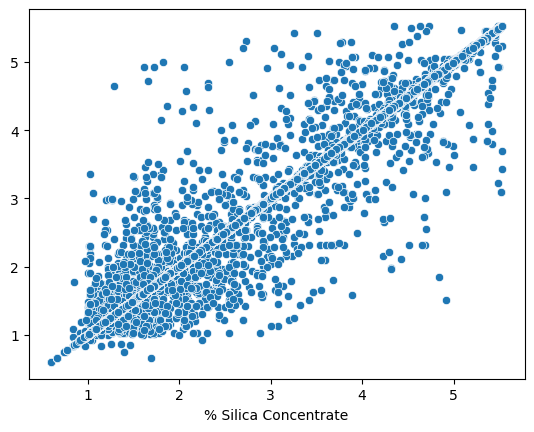

In [45]:
sns.scatterplot(x=test_df_y,y=pred_dt)

In [46]:
k =test_df_x.shape[1]
n = len(test_df_x)
err_dt = test_df_y - pred_dt
mape_dt = np.mean(np.abs(err_dt*100 / test_df_y))
acc_dt = 100 - mape_dt
rmse_dt = float(format(np.sqrt(mean_squared_error(test_df_y, pred_dt)),'.3f'))
mse_dt = mean_squared_error(test_df_y, pred_dt)
mae_dt = mean_absolute_error(test_df_y, pred_dt)
r2_dt = r2_score(test_df_y, pred_dt)
adj_r2_dt = 1-(1-r2_dt)*(n-1)/(n-k-1)

print('RMSE =',rmse_dt, '\nMSE =',mse_dt, '\nMAE =',mae_dt, '\nR2 =', r2_dt, '\nAdjusted R2 =', adj_r2_dt, '\nMAPE =',mape_dt,'\nAccuracy =' ,acc_dt) 

RMSE = 0.085 
MSE = 0.007222794543436563 
MAE = 0.007612760506651531 
R2 = 0.9942973814643475 
Adjusted R2 = 0.9942965293676322 
MAPE = 0.3419393150328075 
Accuracy = 99.6580606849672


# Conclusion

#### Machine learning models can effectively predict quality in mining processes, offering significant benefits for optimization and decision-making. In our analysis of various models, decision trees outperformed linear regression, Lasso regression, and ridge regression in predicting quality.